# Exploratory Analysis on Metabolite and Microbe Data for CRC Prediction

The goal of this project is to evaluate the feasibility of utilizing microbiomics and metabolomics data to predict cases of colorectal cancer (CRC). This dataset contains two classes of features: relative abundance of microorganisms, and  natural-log levels of metabolites. The samples are taken from the stool of 42 CRC and 89 non-CRC patients.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

The 'samples' file contains the true classification of the samples, i.e., the response variable, along with other data about the patients: age, bmi, sex, and race, which are possible confounding variables. 

In [2]:
samples = pd.read_csv("samples.csv", index_col=0)
microbes = pd.read_csv("microbes.csv", index_col=0)
metabolites = pd.read_csv("metabolites.csv", index_col=0)
# Label vector 
labels = samples.case
# Patient features: age, bmi, sex, race
patient_features = samples.iloc[:, 1:5]

Let's take a look at the data:

The microbes data contains 220 features.



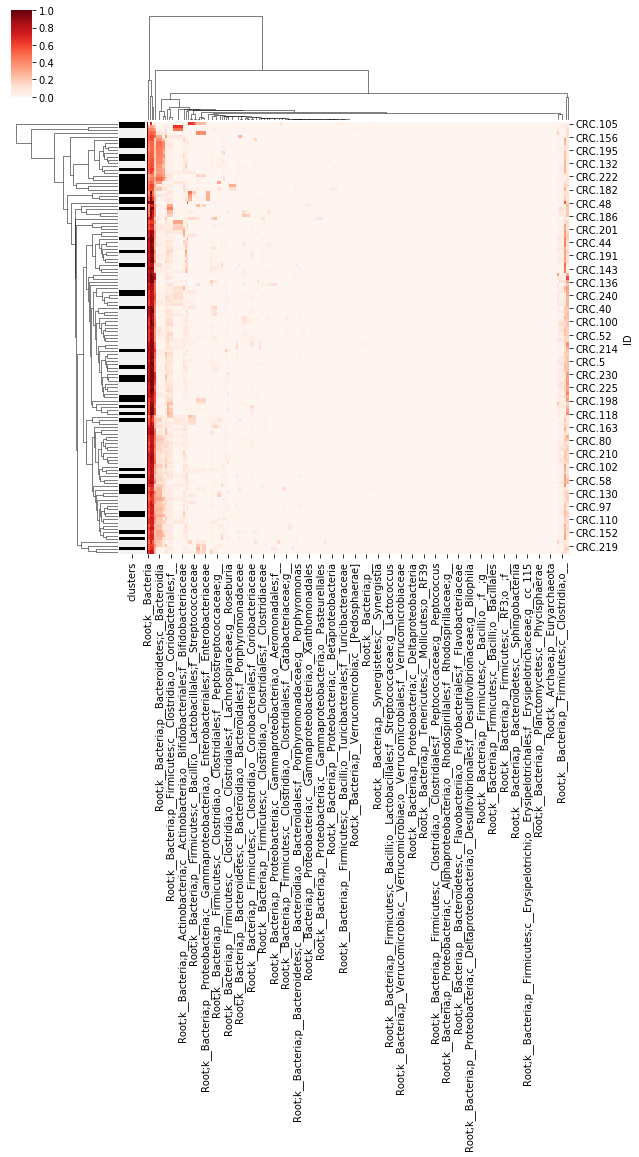

In [3]:
print("The microbes data contains {} features.\n".format(microbes.shape[1]))
# Microbes feature clustering
pal = sns.light_palette('black', np.unique(labels).size)
lut = dict(zip(np.unique(labels), pal))
row_colors = pd.Series(labels, name='clusters').map(lut)
sns.clustermap(microbes, row_colors=row_colors, cmap='Reds')
plt.show()

The metabolites data contains 530 features.



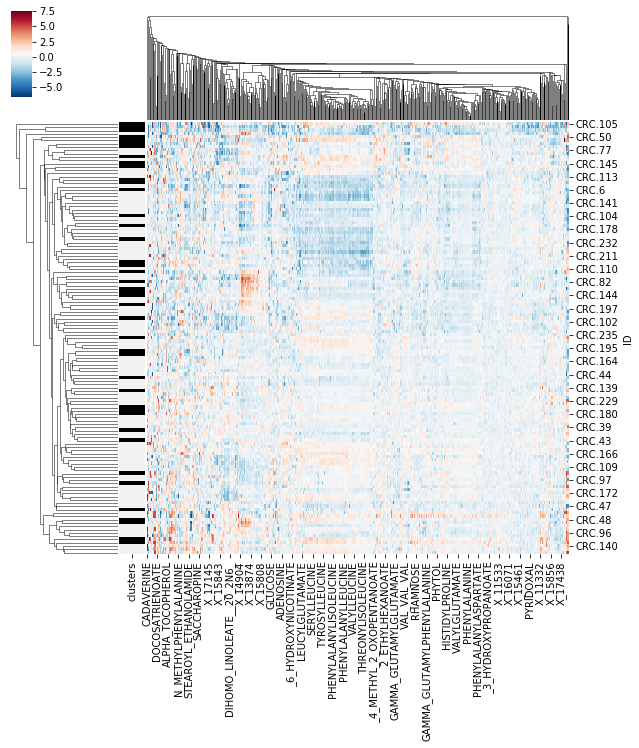

In [5]:
print("The metabolites data contains {} features.\n".format(metabolites.shape[1]))
# Metabolites feature clustering
pal = sns.light_palette('black', np.unique(labels).size)
lut = dict(zip(np.unique(labels), pal))
row_colors = pd.Series(labels, name='clusters').map(lut)
sns.clustermap(metabolites, row_colors=row_colors, cmap='RdBu_r')
plt.show()

The metabolites data contains a good spread of values, but the microbes data is very sparse. It may be useful to apply a transformation or normalization to that dataset.

## Checking for correlation structures

Correlation between the variables can cause problems for some algorithms, such as logistic regression.

In [6]:
metab_corr = np.round(np.corrcoef(metabolites), decimals=4)
micro_corr = np.round(np.corrcoef(microbes), decimals=4)

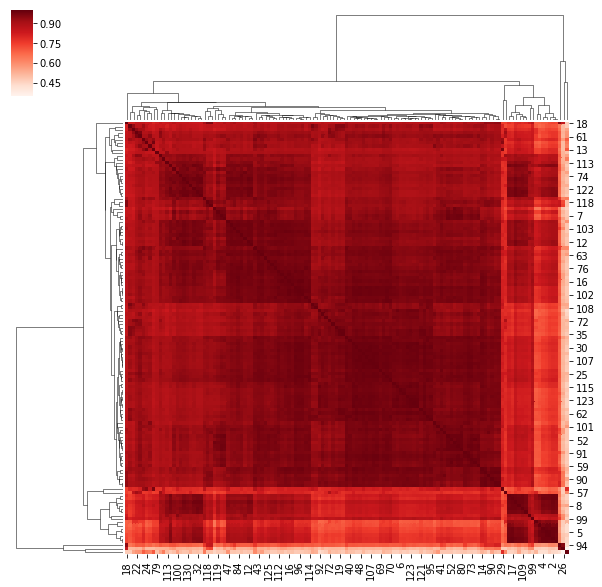

In [7]:
# Microbes correlation clusters
sns.clustermap(micro_corr, cmap='Reds')
plt.show()

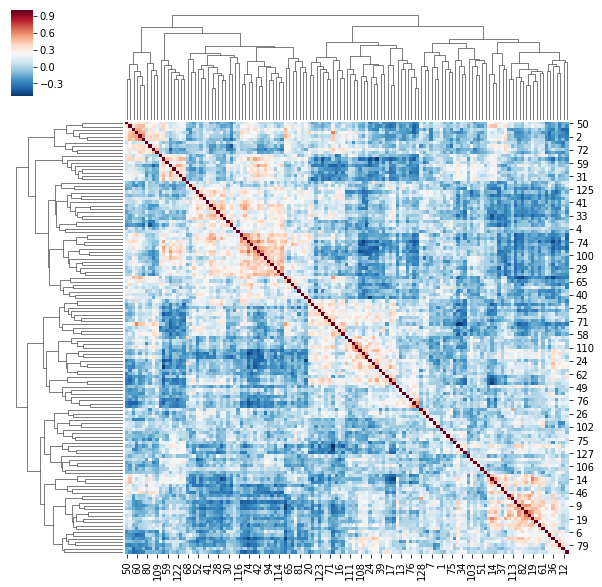

In [8]:
# Metabolites correlation clusters
sns.clustermap(metab_corr, cmap='RdBu_r')
plt.show()

We can see from the heatmaps above that there is high correlation between many of the predictor variables in the microbes data. The metabolites data only has moderate to low correlation.

## Visualizing the classes with PCA

Since many of the variables are correlated, PCA could be useful to reduce dimensions, and orthogonalize the features. Let's see how good a job PCA does at separating the classes:

In [9]:
from sklearn.decomposition import PCA

PCA with microbe data:

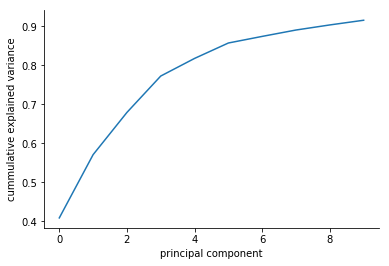

In [10]:
pca1 = PCA(n_components=10)
fit1 = pca1.fit(microbes)
microbes_PCA = pca1.transform(microbes)

plt.ylabel("cummulative explained variance")
plt.xlabel("principal component")
plt.plot(np.cumsum(fit1.explained_variance_ratio_))
sns.despine()
plt.show()

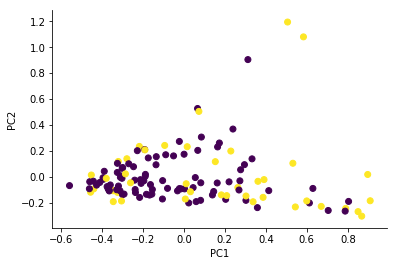

In [11]:
# Plot first two principal components
plt.scatter(microbes_PCA[:, 0], microbes_PCA[:, 1], c=labels)
plt.xlabel("PC1")
plt.ylabel("PC2")
sns.despine()
plt.show()

From the first two components, it seems like PCA is not doing a great job separating the two classes.

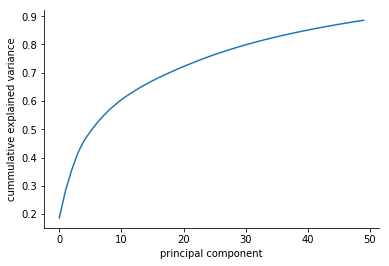

In [13]:
pca2 = PCA(n_components=50)
fit2 = pca2.fit(metabolites)
metabolites_PCA = pca2.transform(metabolites)

plt.ylabel("cummulative explained variance")
plt.xlabel("principal component")
plt.plot(np.cumsum(fit2.explained_variance_ratio_))
sns.despine()
plt.show()

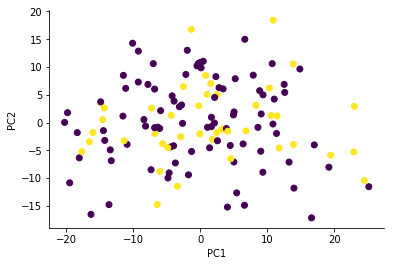

In [14]:
# Plot first two principal components
plt.scatter(metabolites_PCA[:, 0], metabolites_PCA[:, 1], c=labels)
plt.xlabel("PC1")
plt.ylabel("PC2")
sns.despine()
plt.show()